<a href="https://colab.research.google.com/github/piyushpp07/DataScience/blob/main/BINARY%20CLASSIFICATION%20CONFUSION%20MATRIXX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Getting The Data

In [31]:
from sklearn.datasets import fetch_openml

In [32]:
mnist = fetch_openml('mnist_784', version = 1)

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
mnist.data.sample

<bound method NDFrame.sample of        pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
1         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
2         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
3         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
4         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
69995     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
69996     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
69997     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
69998     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
69999     0.0     0.0     0.0     0.0  ...       0.0   

In [ ]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
X = mnist.data.values
X.shape

(70000, 784)

In [ ]:
y = np.array(mnist.target)
y.shape

(70000,)

In [ ]:
X[0].ndim, X[0].shape

(1, (784,))

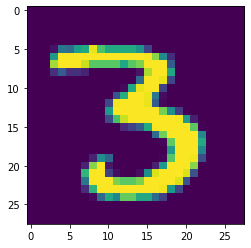

3


In [37]:
plt.imshow(X[12].reshape(28, 28))
plt.show()

print(y[12])

**Convert this to black and white by passing cmap**

In [38]:
y = y.astype('int8')
type(y)

numpy.ndarray

In [39]:
y_5 = y == 5
y_5

array([ True, False, False, ..., False,  True, False])

In [40]:
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(X, y_5)

In [41]:
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((52500, 784), (17500, 784), (52500,), (17500,))

# Select and train Model

In [42]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

In [43]:
sgd.fit(xtrain, ytrain)

SGDClassifier()

In [44]:
y_pred = sgd.predict(xval)

In [45]:
y_pred

array([False, False, False, ..., False, False, False])

In [46]:
yval

array([False, False, False, ..., False, False, False])

In [47]:
(y_pred == yval).sum() / yval.size

0.9684571428571429

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, yval)

0.9684571428571429

In [49]:
xtrain, xval, ytrain, yval = train_test_split(X, y<5)

(70000,)

In [53]:
sgd.fit(xtrain, ytrain)

SGDClassifier()

In [54]:
y_pred = sgd.predict(xval)
accuracy_score(y_pred, yval)

0.8265714285714286

In [55]:
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(X, y_5)

sgd.fit(xtrain, ytrain)
y_pred = sgd.predict(xval)

# Confusion Matrix

In [56]:
from sklearn import metrics

metrics.confusion_matrix(y_pred, yval)

array([[15701,   330],
       [  200,  1269]])

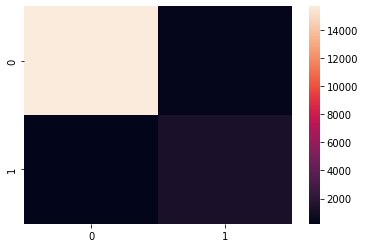

In [57]:
import seaborn as sns

sns.heatmap(metrics.confusion_matrix(y_pred, yval))

In [58]:
metrics.precision_score(y_pred, yval)

0.7936210131332082

In [59]:
metrics.recall_score(y_pred, yval)

0.863852961198094

In [60]:
metrics.f1_score(y_pred, yval)

0.8272490221642763

# Precision/Recall Tradeoff


![Screenshot_20220103_131814.png](https://raw.githubusercontent.com/aman5898/Pepcoding-Data-Science/main/Ch03_Classification/assets/Screenshot_20220103_131814.png)

In [61]:
y_score = sgd.decision_function(xval)  # return score

In [62]:
y_score

array([-10494.05344771,  -2454.00497828,  -9808.52678843, ...,
        -5542.18126293, -20553.69522423, -13990.8499381 ])

In [63]:
y_score.min(), y_score.max()

(-70896.13882290765, 20023.97228621201)

In [69]:
precisions, recalls, thresholds = metrics.precision_recall_curve(yval, y_score)

In [65]:
t = 5698

print(metrics.precision_score(y_score >= t, yval))
print(metrics.recall_score(y_score >= t, yval))

0.2395247029393371
0.9696202531645569


In [66]:
precisions.shape, recalls.shape, thresholds.shape

((17189,), (17189,), (17188,))

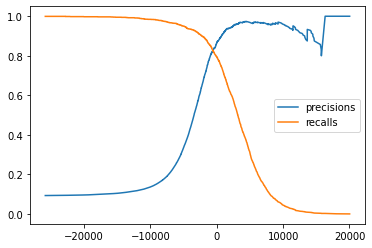

In [67]:
plt.plot(thresholds, precisions[1:], label = 'precisions')
plt.plot(thresholds, recalls[1:], label = 'recalls')

plt.legend()
plt.show()

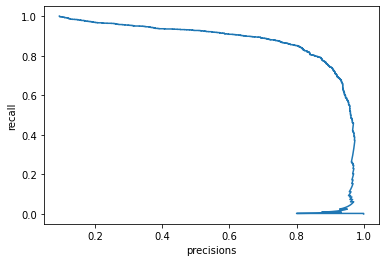

In [68]:
plt.plot(precisions, recalls, label = 'recalls')

plt.xlabel('precisions')
plt.ylabel('recall')
plt.show()

# ROC

Receiver Operating Characteristic curve

In [70]:
fpr, tpr, threshold = metrics.roc_curve(yval, y_score)

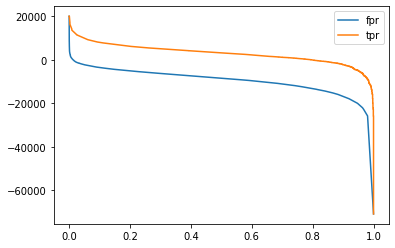

In [71]:
plt.plot(fpr, threshold, label = 'fpr')
plt.plot(tpr, threshold, label = 'tpr')

plt.legend()

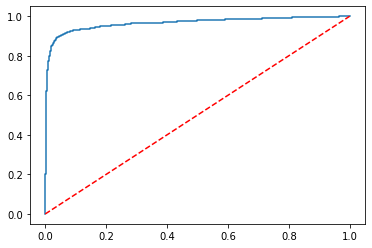

In [72]:
plt.plot(fpr, tpr, label = 'auc')
plt.plot([0, 1], [0, 1], '--r')

In [74]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

In [75]:
forest.fit(xtrain, ytrain)

RandomForestClassifier()

In [76]:
y_score_forest = forest.predict_proba(xval)  # return score

In [77]:
y_score

array([-10494.05344771,  -2454.00497828,  -9808.52678843, ...,
        -5542.18126293, -20553.69522423, -13990.8499381 ])

In [78]:
y_score_forest = y_score_forest[:, 1]
y_score_forest

array([0.01, 0.07, 0.  , ..., 0.06, 0.09, 0.  ])

In [79]:
fpr_f, tpr_f, threshold_f = metrics.roc_curve(yval, y_score_forest)

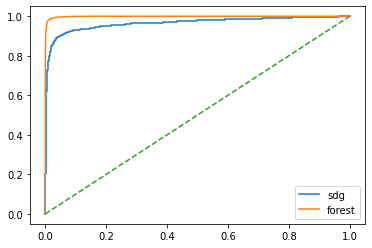

In [80]:
plt.plot(fpr, tpr, label = 'sdg')
plt.plot(fpr_f, tpr_f, label = 'forest')
plt.plot([0, 1], [0, 1], '--')
plt.legend()

# MultiClassClassifier